## Big City Health Data Inventory

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('Big_Cities_Health_Data_Inventory.csv')

### EDA

In [3]:
#to see top 5 rows
df.head()

,Indicator Category,Indicator,Year,Gender,Race/ Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes
0,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2013,Both,All,30.4,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
1,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2012,Both,All,39.6,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
2,HIV/AIDS,"AIDS Diagnoses Rate (Per 100,000 people)",2011,Both,All,41.7,"Atlanta (Fulton County), GA","AIDS cases diagnosed in 2012, 2013, 2014 (as a...",Diagnoses numbers were obtained from the Georg...,NaN,NaN
3,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Male,All,195.8,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN
4,Cancer,All Types of Cancer Mortality Rate (Age-Adjust...,2013,Female,All,135.5,"Atlanta (Fulton County), GA","2012, 2013, 2014; per 100,000 population using...","National Center for Health Statistics (NCHS), CDC",NaN,NaN


In [4]:
# to see bottom 5 rows
df.tail()

,Indicator Category,Indicator,Year,Gender,Race/ Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes
13507,Food Safety,Rate of Laboratory Confirmed Infections Caused...,2013,Female,All,14.3,"Kansas City, MO","2012, 2013, 2014: per 100,000 population using...",MDHSS WebSurv – Communicable Disease Registry ...,NaN,NaN
13508,Food Safety,Rate of Laboratory Confirmed Infections Caused...,2013,Male,All,6.2,"Kansas City, MO","2012, 2013, 2014: per 100,000 population using...",MDHSS WebSurv – Communicable Disease Registry ...,NaN,NaN
13509,Food Safety,Rate of Laboratory Confirmed Infections Caused...,2014,Both,All,12.7,"Kansas City, MO","2012, 2013, 2014: per 100,000 population using...",MDHSS WebSurv – Communicable Disease Registry ...,NaN,NaN
13510,Food Safety,Rate of Laboratory Confirmed Infections Caused...,2014,Female,All,13.3,"Kansas City, MO","2012, 2013, 2014: per 100,000 population using...",MDHSS WebSurv – Communicable Disease Registry ...,NaN,NaN
13511,Food Safety,Rate of Laboratory Confirmed Infections Caused...,2014,Male,All,12.0,"Kansas City, MO","2012, 2013, 2014: per 100,000 population using...",MDHSS WebSurv – Communicable Disease Registry ...,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Indicator Category          13512 non-null  object 
 1   Indicator                   13512 non-null  object 
 2   Year                        13512 non-null  object 
 3   Gender                      13512 non-null  object 
 4   Race/ Ethnicity             13512 non-null  object 
 5   Value                       13499 non-null  float64
 6   Place                       13512 non-null  object 
 7   BCHC Requested Methodology  13004 non-null  object 
 8   Source                      11222 non-null  object 
 9   Methods                     4232 non-null   object 
 10  Notes                       3541 non-null   object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [6]:
df.describe(include = 'all')

,Indicator Category,Indicator,Year,Gender,Race/ Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes
count,13512,13512,13512,13512,13512,13499.000000,13512,13004,11222,4232,3541
unique,11,44,13,3,9,NaN,29,114,306,167,125
top,HIV/AIDS,"Persons Living with HIV/AIDS Rate (Per 100,000...",2012,Both,All,NaN,"Phoenix, AZ","2012, 2013, 2014: per 100,000 population using...",Source: California Electronic Death Registrati...,Population denominators based on extrapolation...,Deaths for which cause was listed as “deferred...
freq,2177,623,3950,9409,5757,NaN,772,734,386,233,381
mean,NaN,NaN,NaN,NaN,NaN,285.688562,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3192.666847,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,16.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,45.200000,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().mean()

Indicator Category            0.000000
Indicator                     0.000000
Year                          0.000000
Gender                        0.000000
Race/ Ethnicity               0.000000
Value                         0.000962
Place                         0.000000
BCHC Requested Methodology    0.037596
Source                        0.169479
Methods                       0.686797
Notes                         0.737937
dtype: float64

In [8]:
df.dropna(subset = ['Value'], inplace = True)

In [9]:
df.Value.isna().sum()

0

In [10]:
df[df.duplicated()]

,Indicator Category,Indicator,Year,Gender,Race/ Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes
12323,Demographics,Unemployment Rate Ages 16+,2013,Both,All,7.4,U.S. Total,NaN,U.S. Census Bureau,NaN,NaN


In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.loc[:,['Methods','Notes']].isna().sum()
#more than 50 % of the data are null values

Methods    9272
Notes      9963
dtype: int64

In [14]:
df.drop(['Methods', 'Notes'], axis = 1, inplace = True)

In [15]:
df['BCHC Requested Methodology'].nunique()

114

In [16]:
df['BCHC Requested Methodology'].value_counts().index[0]

'2012, 2013, 2014: per 100,000 population using 2010 US Census figures. Please specify population/source/ methodology - this is an area where data sources vary greatly. If 2012-2014 not available, provide three most recent years of data'

In [17]:
df['Source'].nunique()

306

In [18]:
df['Source'].value_counts().index[0]

'Source: California Electronic Death Registration System (CA-EDRS), as of April 1, 2016.  Includes immediate cause of death and contributing causes of death.   Includes records for which Long Beach was recorded on the death certificate as the decedent’s city of residence.  Duplicate records due to revisions to the death certificate are not included.  ICD-10 codes were not included in the dataset; algorithms were written to match key words from cause of death to the corresponding ICD-10 diagnosis.'

In [19]:
for i in ['BCHC Requested Methodology', 'Source']:
    df[i].fillna(df['Source'].value_counts().index[0], inplace = True)
    

In [20]:
df.isna().sum()

Indicator Category            0
Indicator                     0
Year                          0
Gender                        0
Race/ Ethnicity               0
Value                         0
Place                         0
BCHC Requested Methodology    0
Source                        0
dtype: int64

In [21]:
df['Indicator Category'].value_counts()


HIV/AIDS                                    2177
Injury and Violence                         1916
Nutrition, Physical Activity, & Obesity     1837
Infectious Disease                          1486
Cancer                                      1432
Maternal and Child Health                   1323
Behavioral Health/Substance Abuse            979
Food Safety                                  874
Life Expectancy and Death Rate (Overall)     544
Demographics                                 500
Tobacco                                      430
Name: Indicator Category, dtype: int64

In [22]:
grouped = df.groupby('Indicator Category')['Value'].sum().reset_index()

In [23]:
grouped

,Indicator Category,Value
0,Behavioral Health/Substance Abuse,126869.2
1,Cancer,117156.3
2,Demographics,2603225.2
3,Food Safety,8314.9
4,HIV/AIDS,526276.1
5,Infectious Disease,33346.0
6,Injury and Violence,19324.3
7,Life Expectancy and Death Rate (Overall),278356.3
8,Maternal and Child Health,11338.2
9,"Nutrition, Physical Activity, & Obesity",125725.3


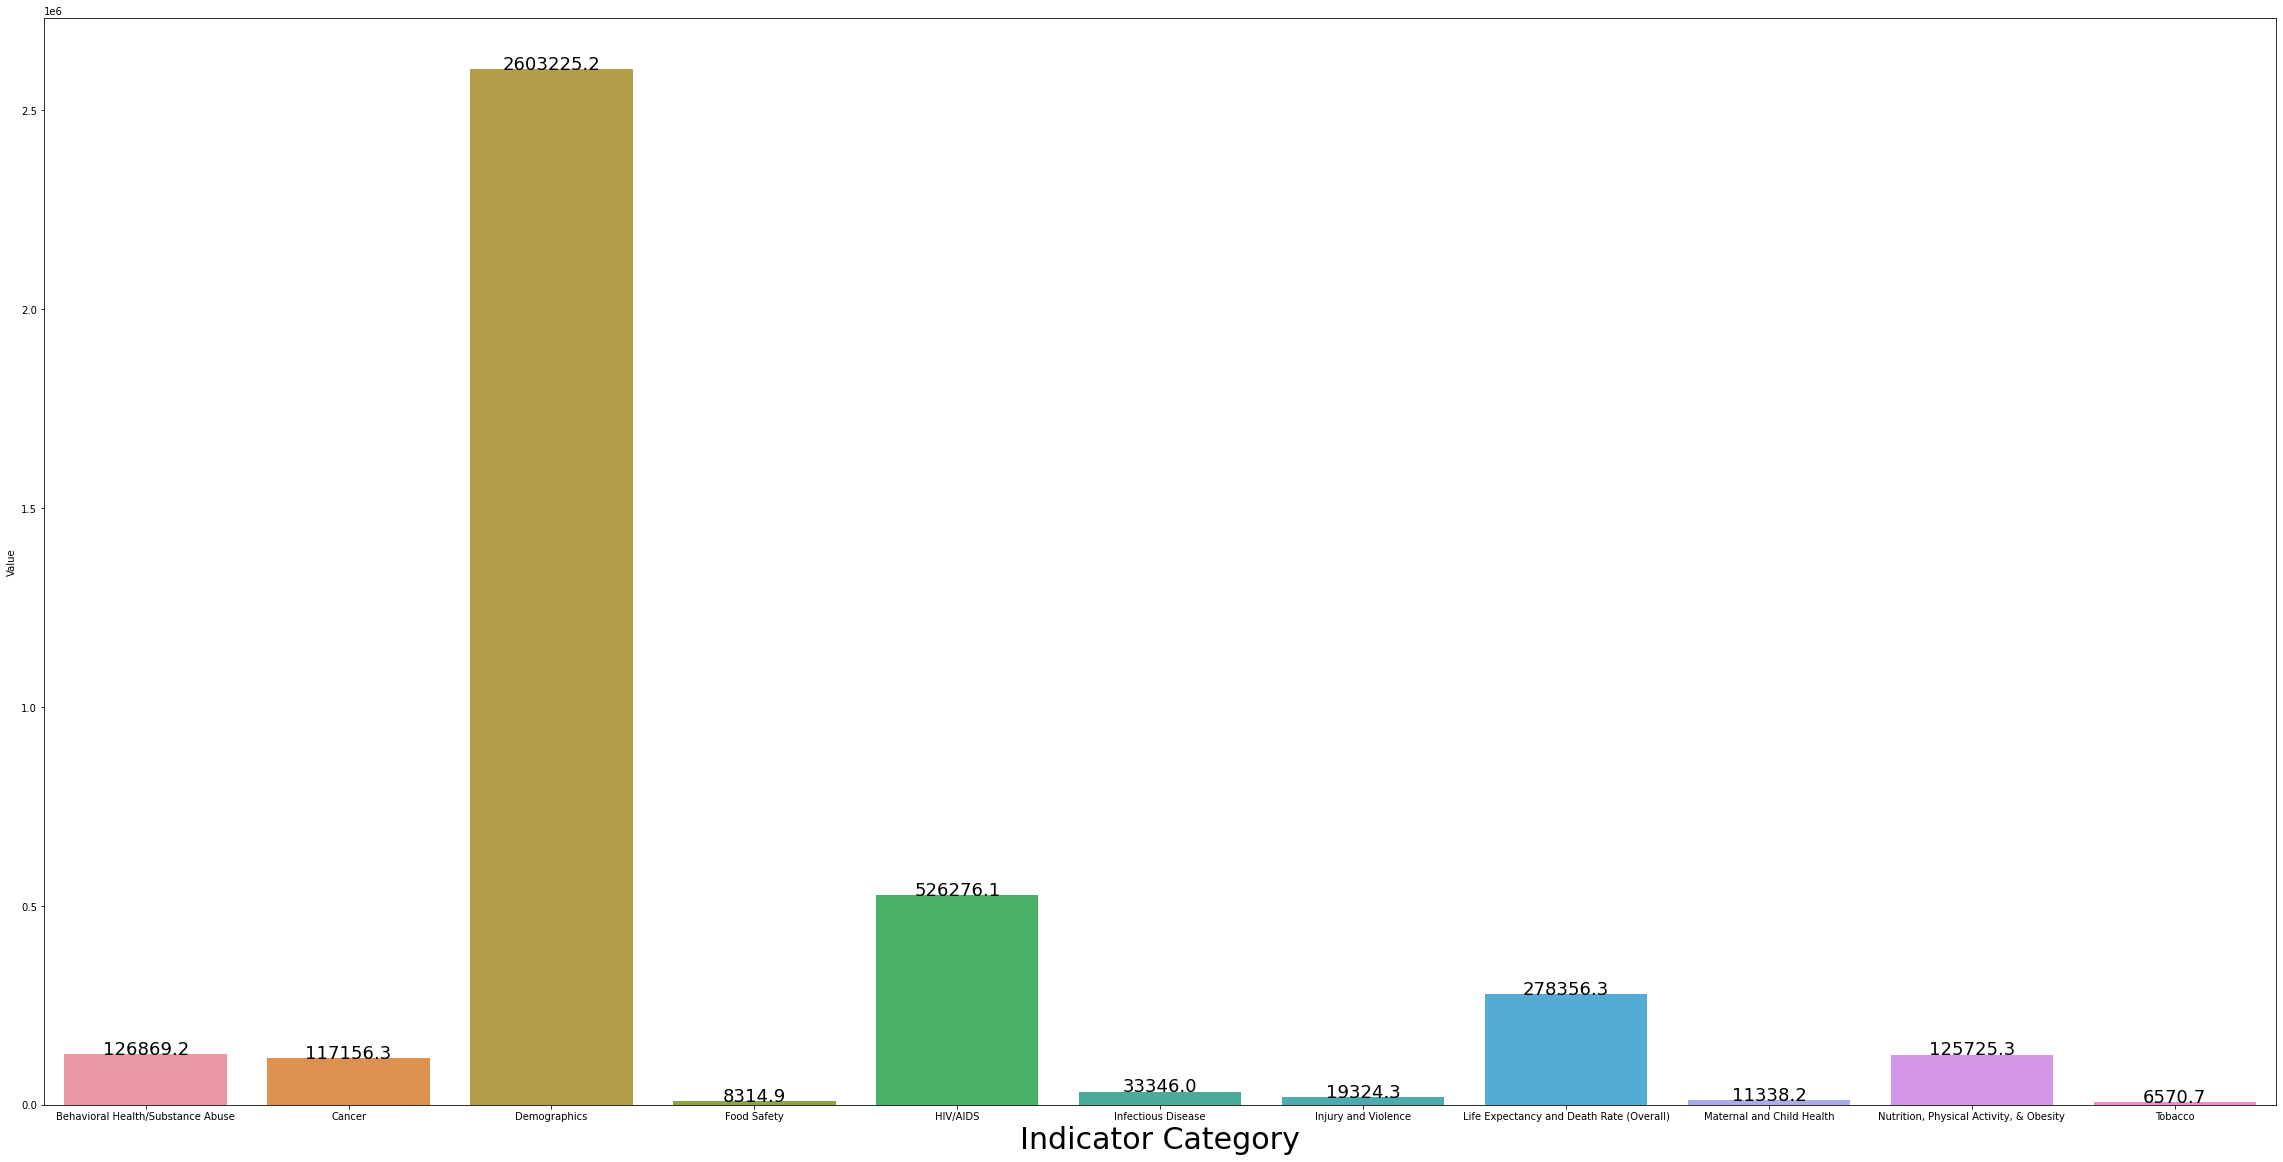

In [24]:
plt.figure(figsize = (40,20))
g = sns.barplot(x = grouped['Indicator Category'], y = grouped['Value'])
for index, row in grouped.iterrows():
    g.text(row.name,row.Value, round(row.Value,2), color='black', ha="center", fontsize = 18)
    g.set_xlabel("Indicator Category", fontsize=30)
plt.show()
#Looks Demographics has more values

In [25]:
df['Year'].value_counts()

2012         3947
2013         3651
2011         3498
2010         1356
2014         1019
2008-2012       7
2011-2012       6
2015            6
2007-2012       3
2003-2012       2
2011-2013       1
2003-2013       1
2004-2013       1
Name: Year, dtype: int64

In [26]:
df['Gender'].value_counts()

Both      9395
Female    2423
Male      1680
Name: Gender, dtype: int64

In [27]:
df['Race/ Ethnicity'].value_counts()

All                              5756
White                            1914
Black                            1865
Hispanic                         1687
Asian/PI                         1013
Other                             565
Native American                   370
Multiracial                       270
American Indian/Alaska Native      58
Name: Race/ Ethnicity, dtype: int64

In [28]:
grouped_place = df.groupby('Place')['Value'].sum().reset_index()

grouped_place.head()

,Place,Value
0,"Atlanta (Fulton County), GA",125810.6
1,"Baltimore, MD",128560.6
2,"Boston, MA",146261.1
3,"Chicago, IL",150423.3
4,"Cleveland, OH",86749.3


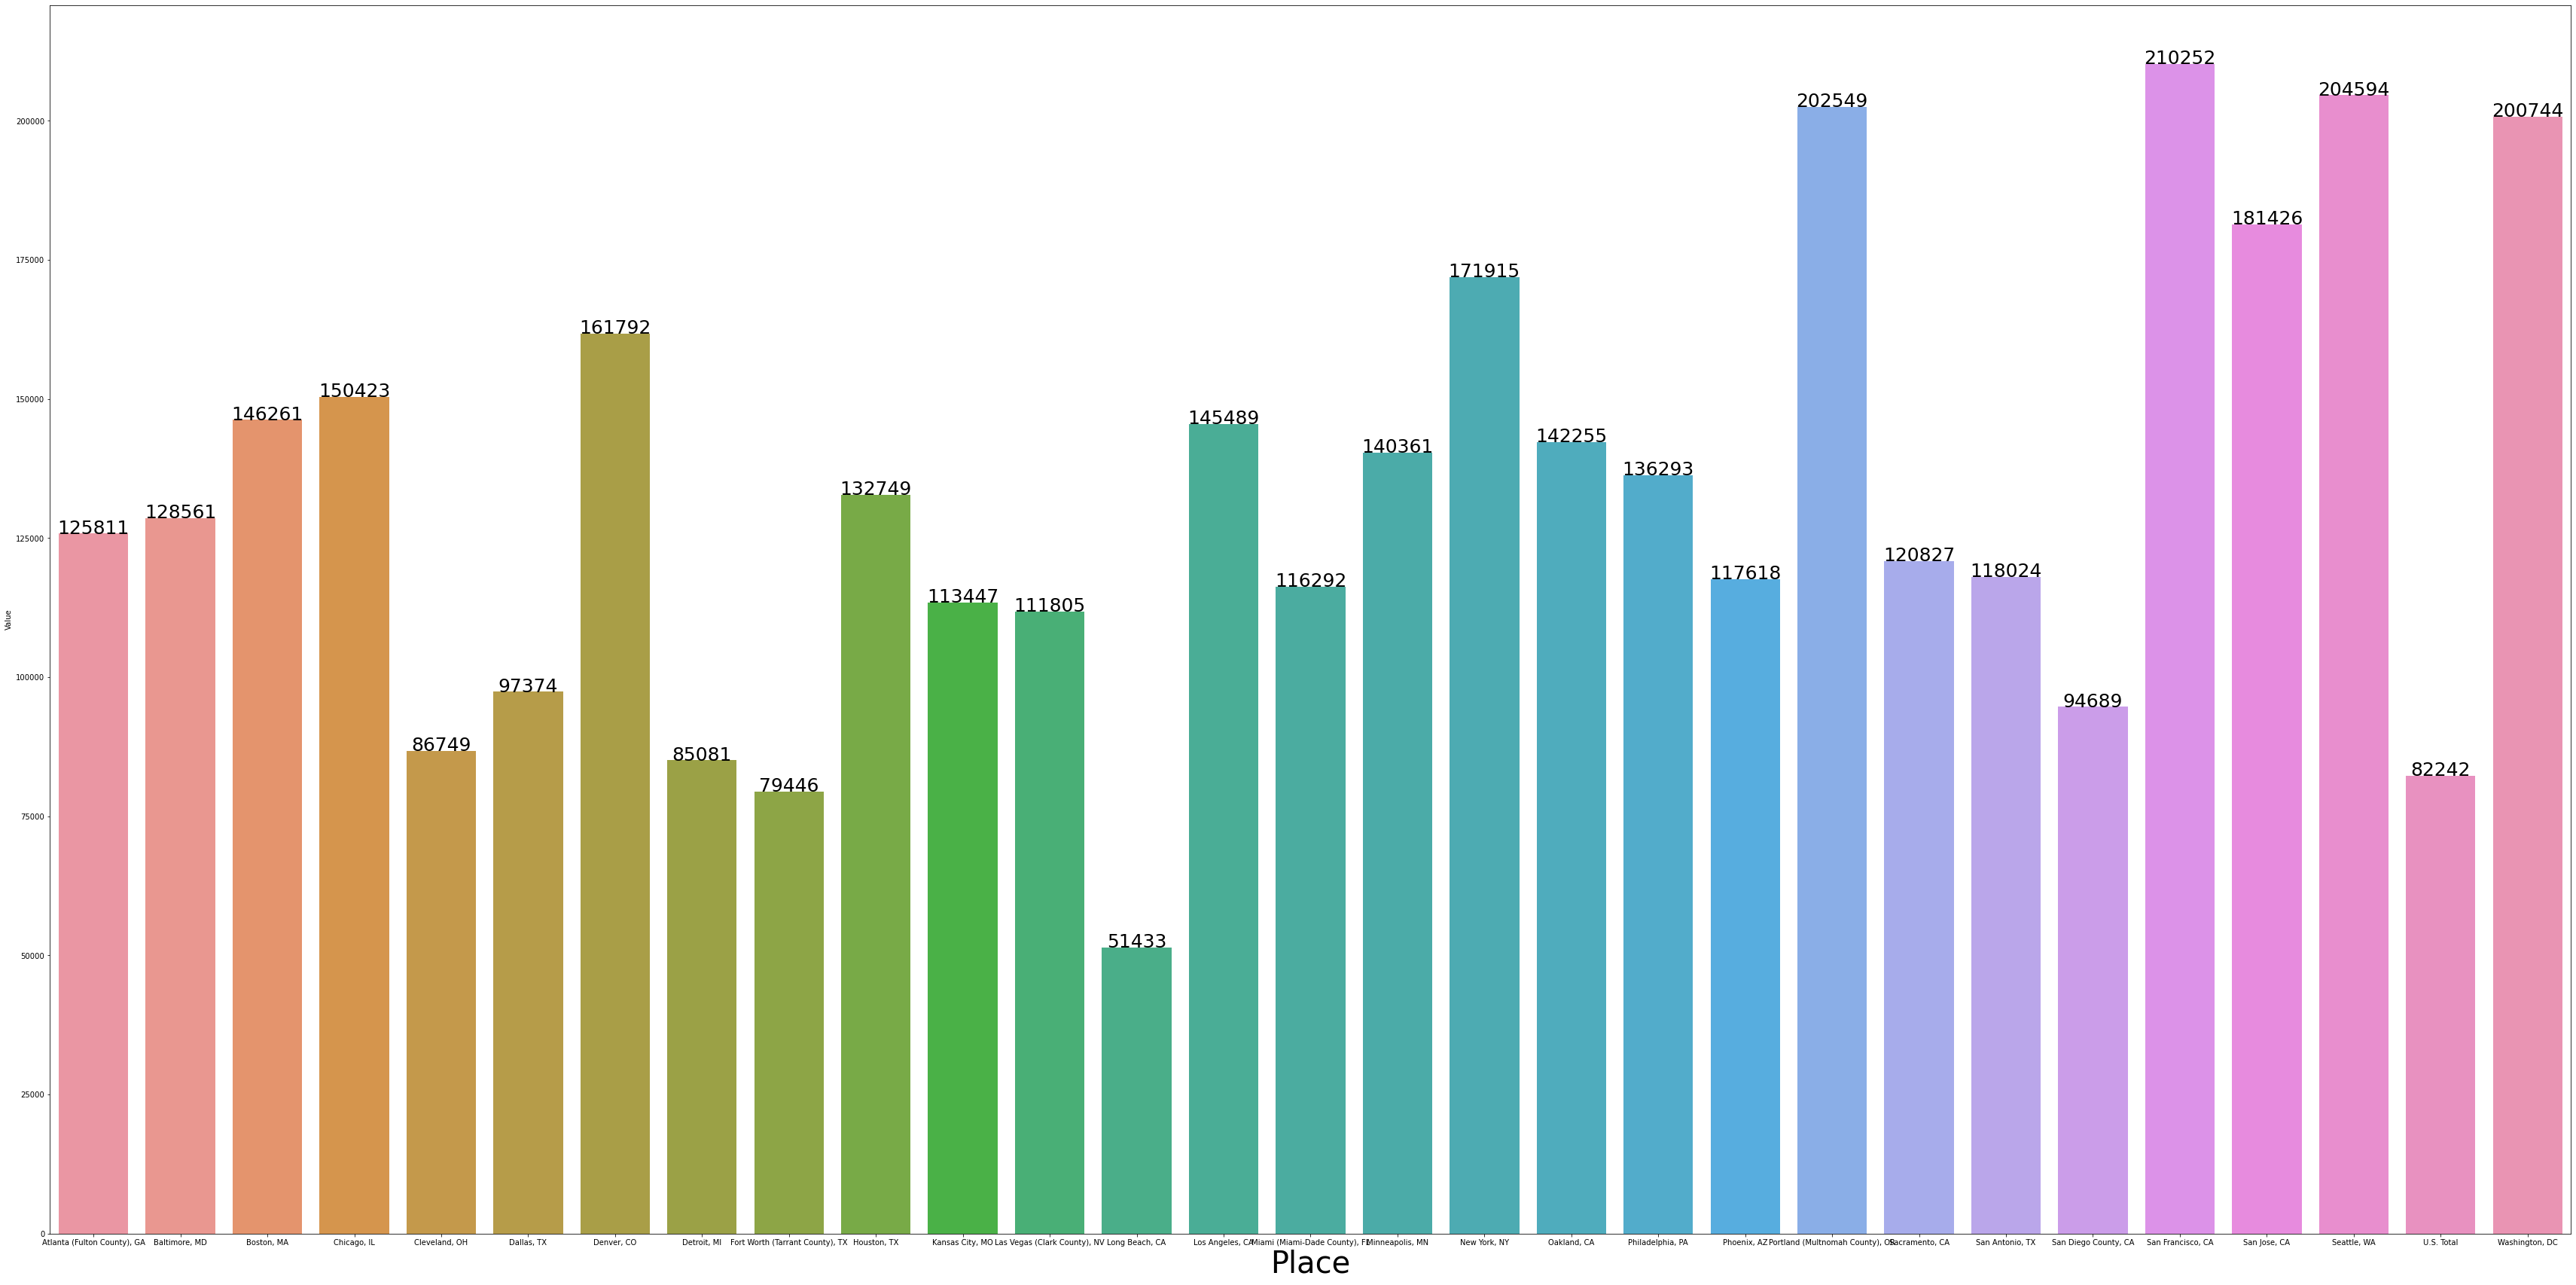

In [29]:
plt.figure(figsize = (60,30))
g = sns.barplot(x = grouped_place['Place'], y = grouped_place['Value'])
for index, row in grouped_place.iterrows():
    g.text(row.name,row.Value, round(row.Value), color='black', ha="center", fontsize = 25)
    g.set_xlabel("Place", fontsize=40)
plt.show()

#### Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
df_encoded = pd.DataFrame()

In [ ]:
data_to_encoded = df.select_dtypes(exclude = np.number)

In [33]:
for i in data_to_encoded:
    df_encoded[i] = le.fit_transform(df[i])

NameError: name 'data_to_encoded' is not defined

In [ ]:
df_encoded

In [ ]:
y = df['Value']

#### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size = 0.3, random_state = 103)

#### Linear Model

In [ ]:
lm = LinearRegression()

lm.fit(X_train, y_train)

In [ ]:
train_pred = lm.predict(X_train)

test_pred = lm.predict(X_test)

In [ ]:
plt.figure(figsize = (16,6))
sns.kdeplot(y_train - train_pred)

In [ ]:
plt.figure(figsize = (16,6))
sns.kdeplot(np.array(y_test) - test_pred)

### Error Metrics

In [ ]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*11)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))